In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Spotify_Dataset_V3.csv", sep=";")
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69846 entries, 0 to 69845
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              69846 non-null  int64  
 1   Title                             69846 non-null  object 
 2   Artists                           69846 non-null  object 
 3   Date                              69846 non-null  object 
 4   Danceability                      69846 non-null  float64
 5   Energy                            69846 non-null  float64
 6   Loudness                          69846 non-null  float64
 7   Speechiness                       69846 non-null  float64
 8   Acousticness                      69846 non-null  float64
 9   Instrumentalness                  69846 non-null  float64
 10  Valence                           69846 non-null  float64
 11  # of Artist                       69846 non-null  object 
 12  Arti

In [ ]:
# data = df[["f_batterylife", "f_price", "f_size", "f_multitasking", "f_noise", "f_performance", "f_neural", "f_synergy"]]
data = df[["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Valence"]]
data = data.values
data.shape

(69846, 7)

In [ ]:
cov = np.cov(data.T)
cov.shape

(7, 7)

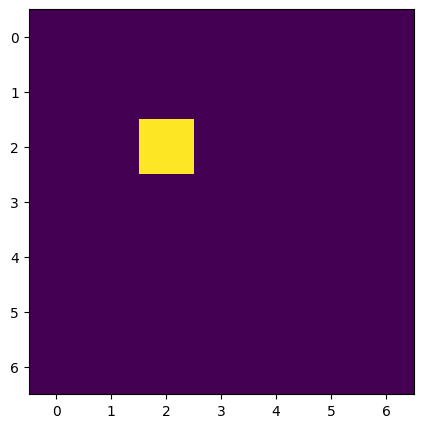

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(cov)
plt.show()

In [ ]:
cov

array([[ 2.02600106e-02,  4.89822405e-03,  1.17865887e+02,
         2.42230202e-03, -6.53822223e-03, -3.40184584e-04,
         1.45851875e-02],
       [ 4.89822405e-03,  2.56526791e-02,  2.59998723e+02,
        -6.04797120e-04, -2.10160754e-02, -2.29516094e-03,
         1.39157252e-02],
       [ 1.17865887e+02,  2.59998723e+02,  9.61028406e+06,
         1.35444225e+01, -2.32584450e+02, -2.48838384e+01,
         1.86470828e+02],
       [ 2.42230202e-03, -6.04797120e-04,  1.35444225e+01,
         8.08143582e-03, -1.26720707e-03, -1.02043753e-04,
        -5.76701768e-04],
       [-6.53822223e-03, -2.10160754e-02, -2.32584450e+02,
        -1.26720707e-03,  5.95230224e-02,  3.08092860e-04,
        -3.03542095e-03],
       [-3.40184584e-04, -2.29516094e-03, -2.48838384e+01,
        -1.02043753e-04,  3.08092860e-04,  7.32126144e-03,
        -3.63375465e-03],
       [ 1.45851875e-02,  1.39157252e-02,  1.86470828e+02,
        -5.76701768e-04, -3.03542095e-03, -3.63375465e-03,
         5.5730308

In [ ]:
def outlier_thresholds(data):
  avg = np.mean(data)
  low = np.quantile(data, 0.01)
  high = np.quantile(data, 0.99)
  iqr = high - low
  min = avg - 1.5*iqr
  max = avg + 1.5*iqr
  return min, max

def remove_outliers(df):
  columns = df.columns
  for column in columns:
    data = df[column]
    min, max = outlier_thresholds(data)
    df[df[column] < min] = None
    df[df[column] > max] = None
  df.dropna(inplace=True)
  return df




In [ ]:
df1 = df[["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Valence"]]
print(f"Number of rows before eliminating outliers: {len(df1)}.")
df1 = remove_outliers(df1)
print(f"Number of rows after eliminating outliers: {len(df1)}.")


Number of rows before eliminating outliers: 69846.
Number of rows after eliminating outliers: 69683.


<ipython-input-48-051893ae5010>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] < min] = None
<ipython-input-48-051893ae5010>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] > max] = None
<ipython-input-48-051893ae5010>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)

In [ ]:
def remove_cor_features(df):
  columns = df.columns
  corrs = np.zeros((len(columns), len(columns)))
  for i in range(len(columns)):
    for j in range(i+1, len(columns)):
      cor = np.corrcoef(df[columns[i]], df[columns[j]])[0, 1]
      corrs[i, j] = cor
  return corrs


In [ ]:
corr_coef = remove_cor_features(df1)

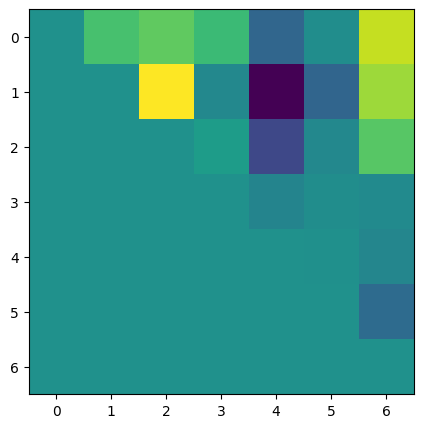

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(corr_coef)
plt.show()

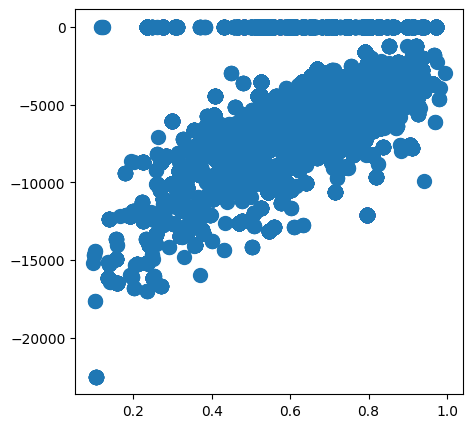

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(df1[df1.columns[1]], df1[df1.columns[2]], s=100)
plt.show()

In [ ]:
print(corr_coef)

[[ 0.          0.2148171   0.26594003  0.18944205 -0.1875872  -0.01758551
   0.43356066]
 [ 0.          0.          0.5266975  -0.04201332 -0.53813876 -0.19176648
   0.36887486]
 [ 0.          0.          0.          0.0493052  -0.3056066  -0.04307227
   0.24869852]
 [ 0.          0.          0.          0.         -0.05798101 -0.01752554
  -0.02695501]
 [ 0.          0.          0.          0.          0.         -0.00445783
  -0.05008218]
 [ 0.          0.          0.          0.          0.          0.
  -0.16507272]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]]


<ipython-input-56-350d329afa3b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1.columns[1]] = min_max_scaler(df1[df1.columns[1]])
<ipython-input-56-350d329afa3b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1.columns[2]] = min_max_scaler(df1[df1.columns[2]])


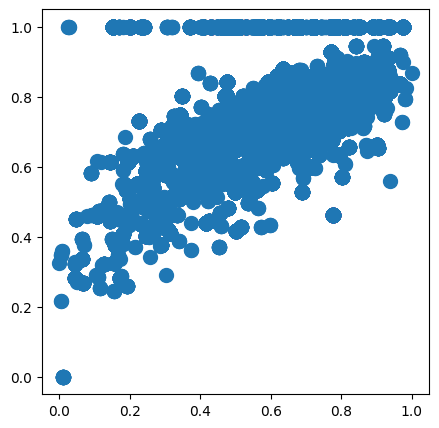

In [ ]:
def min_max_scaler(data):
  min = np.min(data)
  max = np.max(data)
  data = (data - min) / (max - min)
  return data

df1[df1.columns[1]] = min_max_scaler(df1[df1.columns[1]])
df1[df1.columns[2]] = min_max_scaler(df1[df1.columns[2]])

plt.figure(figsize=(5, 5))
plt.scatter(df1[df1.columns[1]], df1[df1.columns[2]], s=100)
plt.show()


<ipython-input-57-2e09b3443c53>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1.columns[1]] = standard_scaler(df1[df1.columns[1]])
<ipython-input-57-2e09b3443c53>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1.columns[2]] = standard_scaler(df1[df1.columns[2]])


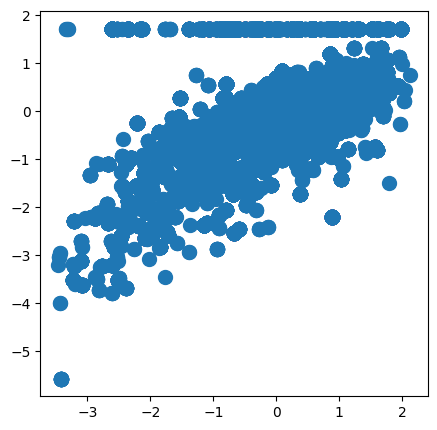

In [ ]:
def standard_scaler(data):
  avg = np.mean(data)
  std = np.std(data)
  data = (data - avg) / std
  return data

df1[df1.columns[1]] = standard_scaler(df1[df1.columns[1]])
df1[df1.columns[2]] = standard_scaler(df1[df1.columns[2]])

plt.figure(figsize=(5, 5))
plt.scatter(df1[df1.columns[1]], df1[df1.columns[2]], s=100)
plt.show()